# Fundamental Notions

What recommendation system tries to solve ? 
**Given users, items, and some form of interaction data, predict how much a user will like an item they haven’t seen yet.**
Examples of interactions: ratings (1–5 stars) , clicks / views, purchases, likes / skips, watch time

1. **Content-Based Filtering** : Recommend items similar to what the user liked before
    * We need item features
    * Build the user profile vector by averaging liked items
    * Recommend items with high similarity
    * Over-specialization , doesn't learn from other users
3. **Collaborative Filtering** : Users who behaved similarly in the past will like similar things.
    * We have an interaction matrix ( sparse matrix ) - users will be in each line item.
    * **User-based collaborative filtering** : Find similar users to me and recommend what they liked.
    * **Item-Based Collaborative Filtering** : It computes the similarity of two items based on who liked it. For example, if many users watched interstellar also watched The martian, then those movies are similar - even if know nothing about genre. 
   * **Matrix Factorization ( SVD & Friends)** 

# User-Based Collaborative Filtering

1. Start with user–item matrix
2. Compute similarity between users
3. Pick k nearest neighbors of target user
4. Predict unknown ratings using neighbors
5. Recommend top items

\begin{align*}
\Large \hat{R}_{u,i} &= \LARGE \bar{R}_u + 
\frac{\sum_{v \in N(u)} \text{sim}(u,v) \cdot (R_{v,i} - \bar{R}_v)}
{\sum_{v \in N(u)} |\text{sim}(u,v)|}
\end{align*}


* $\hat{R}_{u,i}$ - predicted rating of user  u for item i
* $R_{v,i}$ - rating of neighbor user v for item i 
* $\bar{R}_u$ - average rating of user u 
* $\bar{R}_v$ - average rating of neighbor user v 
* $N(u)$ - set of nearest neighbors of user u 
* $\text{sim}(u,v)$ - similarity between user u and user v


In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 0: Set seed for reproducibility
np.random.seed(42)

# Step 1: Create 10 user names
users = ['Alice', 'Bob', 'Carol', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy']

# Step 2: Create 20 item names (e.g., products, movies, books)
items = [
    'Interstellar', 'The Martian', 'Inception', 'Arrival', 'Gravity',
    'Memento', 'Tenet', 'Dunkirk', 'Avatar', 'Titanic',
    'Joker', 'Parasite', 'Coco', 'Soul', 'Up',
    'The Godfather', 'Pulp Fiction', 'Fight Club', 'Forrest Gump', 'Gladiator'
]

# Step 3: Generate random ratings (1-5) with some zeros for missing data
ratings_data = np.random.choice([0,1,2,3,4,5], size=(len(users), len(items)), p=[0.2,0.1,0.15,0.2,0.2,0.15])

# Step 4: Create DataFrame
ratings = pd.DataFrame(ratings_data, index=users, columns=items)

print("Synthetic User-Item Ratings Matrix:\n")
display(ratings)


Synthetic User-Item Ratings Matrix:



,Interstellar,The Martian,Inception,Arrival,Gravity,Memento,Tenet,Dunkirk,Avatar,Titanic,Joker,Parasite,Coco,Soul,Up,The Godfather,Pulp Fiction,Fight Club,Forrest Gump,Gladiator
Alice,2,5,4,3,0,0,0,5,3,4,0,5,4,1,0,0,2,3,2,1
Bob,3,0,1,2,3,4,0,3,3,0,3,0,0,5,5,4,2,0,4,2
Carol,0,3,0,5,1,4,2,3,3,0,5,4,5,5,3,5,0,0,0,2
David,2,1,4,2,1,3,0,4,0,5,4,0,0,4,4,4,4,0,2,0
Eve,5,3,2,0,2,2,4,3,5,3,0,4,4,3,4,3,3,2,0,0
Frank,0,3,2,3,5,1,2,4,1,0,1,0,5,4,3,5,4,0,5,3
Grace,4,5,2,0,1,2,4,5,0,3,2,1,0,2,5,2,3,4,2,5
Heidi,5,1,3,2,1,0,3,3,0,1,5,1,0,3,5,1,4,4,1,4
Ivan,2,3,3,3,0,4,2,0,0,3,4,0,3,1,3,0,4,2,5,0
Judy,2,0,5,5,1,4,4,3,3,1,0,5,5,3,2,2,4,5,5,4


In [20]:
# Step 2: Compute user similarity (cosine)
# Fill missing values with 0 for similarity computation
ratings_filled = ratings.fillna(0)
user_similarity = pd.DataFrame(
    cosine_similarity(ratings_filled),
    index=users,
    columns=users
)
print("\nUser Similarity Matrix:\n")
display(user_similarity)


User Similarity Matrix:



,Alice,Bob,Carol,David,Eve,Frank,Grace,Heidi,Ivan,Judy
Alice,1.000000,0.368865,0.554912,0.537078,0.725337,0.559192,0.631169,0.516575,0.587360,0.743279
Bob,0.368865,1.000000,0.709794,0.791203,0.637459,0.768290,0.652928,0.695942,0.615765,0.636753
Carol,0.554912,0.709794,1.000000,0.611867,0.669122,0.715476,0.538244,0.546641,0.553023,0.669727
David,0.537078,0.791203,0.611867,1.000000,0.629441,0.673705,0.701770,0.723675,0.734968,0.584187
Eve,0.725337,0.637459,0.669122,0.629441,1.000000,0.638792,0.734209,0.657818,0.579442,0.729421
Frank,0.559192,0.768290,0.715476,0.673705,0.638792,1.000000,0.651182,0.594926,0.635489,0.730971
Grace,0.631169,0.652928,0.538244,0.701770,0.734209,0.651182,1.000000,0.866025,0.664832,0.668869
Heidi,0.516575,0.695942,0.546641,0.723675,0.657818,0.594926,0.866025,1.000000,0.676123,0.679213
Ivan,0.587360,0.615765,0.553023,0.734968,0.579442,0.635489,0.664832,0.676123,1.000000,0.719788
Judy,0.743279,0.636753,0.669727,0.584187,0.729421,0.730971,0.668869,0.679213,0.719788,1.000000


In [21]:
# Step 3: Predict ratings for a specific user (Alice) using weighted average
def predict_ratings(user_name, ratings_matrix, similarity_matrix, k=2):
    user_idx = ratings_matrix.index.get_loc(user_name)
    # Get top-k similar users
    sim_scores = similarity_matrix.iloc[user_idx].copy()
    sim_scores = sim_scores.drop(user_name)  # exclude self
    top_k_users = sim_scores.sort_values(ascending=False)[:k]
    
    predicted_ratings = {}
    for item in ratings_matrix.columns:
        if ratings_matrix.loc[user_name, item] == 0:  # only predict missing
            numerator = 0
            denominator = 0
            for neighbor in top_k_users.index:
                neighbor_rating = ratings_matrix.loc[neighbor, item]
                if neighbor_rating != 0:
                    numerator += top_k_users[neighbor] * neighbor_rating
                    denominator += abs(top_k_users[neighbor])
            predicted_ratings[item] = numerator / denominator if denominator != 0 else 0
    return predicted_ratings

In [22]:
alice_predictions = predict_ratings('Alice', ratings, user_similarity, k=2)
print("\nPredicted Ratings for Alice:\n")
print(alice_predictions)

# Step 4: Recommend top N items
top_n = 2
recommended_items = sorted(alice_predictions, key=alice_predictions.get, reverse=True)[:top_n]
print(f"\nTop {top_n} recommendations for Alice:\n{recommended_items}")


Predicted Ratings for Alice:

{'Gravity': np.float64(1.493891623886943), 'Memento': np.float64(3.012216752226114), 'Tenet': np.float64(4.0), 'Joker': 0, 'Up': np.float64(2.987783247773886), 'The Godfather': np.float64(2.4938916238869435)}

Top 2 recommendations for Alice:
['Tenet', 'Memento']


In [24]:
# Function to get top-k recommendations for all users
def get_top_k_recommendations(ratings_matrix, similarity_matrix, k_neighbors=2, top_k=3):
    users = ratings_matrix.index
    recommendations = pd.DataFrame(index=users)
    
    for user in users:
        preds = predict_ratings(user, ratings_matrix, similarity_matrix, k=k_neighbors)
        # Sort predicted items descending
        sorted_items = sorted(preds, key=preds.get, reverse=True)
        # Fill top-k columns dynamically
        for i in range(top_k):
            col_name = f'Top-{i+1}'
            recommendations.loc[user, col_name] = sorted_items[i] if i < len(sorted_items) else None
    
    return recommendations

# Example usage:
top_k_recs_df = get_top_k_recommendations(ratings_df, user_similarity, k_neighbors=2, top_k=3)

print("Top-3 Recommendations for All Users:\n")
display(top_k_recs_df)


Top-3 Recommendations for All Users:



,Top-1,Top-2,Top-3
Alice,Tenet,Memento,Up
Bob,Titanic,Coco,Tenet
Carol,Forrest Gump,Pulp Fiction,Interstellar
David,Avatar,Coco,Tenet
Eve,Arrival,Gladiator,Forrest Gump
Frank,Parasite,Fight Club,Interstellar
Grace,Avatar,Coco,Arrival
Heidi,Memento,Avatar,Coco
Ivan,Parasite,Gladiator,Dunkirk
Judy,The Martian,Joker,None


# Item - Based Collaborative Filtering 

In [25]:
# Step 0: Imports and Seed
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

np.random.seed(101)  # reproducible

# Step 1: Create synthetic "realistic" user-item rating data
users = ['Alice', 'Bob', 'Carol', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy']

items = [
    'Interstellar', 'The Martian', 'Inception', 'Arrival', 'Gravity',
    'Memento', 'Tenet', 'Dunkirk', 'Avatar', 'Titanic',
    'Joker', 'Parasite', 'Coco', 'Soul', 'Up',
    'The Godfather', 'Pulp Fiction', 'Fight Club', 'Forrest Gump', 'Gladiator'
]

# Generate ratings 0-5 with 0 as missing (sparse)
ratings_data = np.random.choice([0,1,2,3,4,5], size=(len(users), len(items)), p=[0.25,0.1,0.15,0.2,0.2,0.1])
ratings_df = pd.DataFrame(ratings_data, index=users, columns=items)

print("User-Item Ratings Matrix:\n")
display(ratings_df)


User-Item Ratings Matrix:



,Interstellar,The Martian,Inception,Arrival,Gravity,Memento,Tenet,Dunkirk,Avatar,Titanic,Joker,Parasite,Coco,Soul,Up,The Godfather,Pulp Fiction,Fight Club,Forrest Gump,Gladiator
Alice,3,3,0,0,3,4,1,4,4,0,3,2,0,4,5,0,0,3,4,1
Bob,3,3,0,0,0,5,3,3,4,3,5,4,2,2,5,1,4,4,3,5
Carol,0,0,4,4,0,1,3,0,4,2,3,3,0,0,3,0,3,0,0,0
David,2,4,5,2,2,3,1,0,0,3,4,3,3,2,3,0,3,3,4,0
Eve,4,3,3,2,5,0,1,0,0,5,0,3,3,2,0,4,2,3,4,3
Frank,3,1,2,0,5,1,0,0,5,2,4,5,4,2,5,4,0,4,4,2
Grace,0,4,4,2,2,2,0,3,2,3,2,2,0,5,0,3,3,0,4,0
Heidi,3,0,4,4,3,1,5,3,2,4,0,4,0,4,1,3,5,5,0,5
Ivan,3,5,3,1,3,2,3,3,0,4,4,4,1,3,0,1,4,4,4,3
Judy,5,2,0,0,0,0,0,5,4,5,3,2,1,2,3,4,0,4,0,3


In [27]:
# Fill missing ratings with 0 for similarity calculation
ratings_filled = ratings_df.fillna(0)

# Compute item-item similarity
item_similarity = pd.DataFrame(
    cosine_similarity(ratings_filled.T),  # transpose to get items as rows
    index=items,
    columns=items
)

display(item_similarity)

,Interstellar,The Martian,Inception,Arrival,Gravity,Memento,Tenet,Dunkirk,Avatar,Titanic,Joker,Parasite,Coco,Soul,Up,The Godfather,Pulp Fiction,Fight Club,Forrest Gump,Gladiator
Interstellar,1.000000,0.737442,0.529923,0.424264,0.754594,0.607332,0.596962,0.768800,0.695675,0.877058,0.733872,0.846620,0.733333,0.761560,0.716653,0.805313,0.595543,0.959126,0.709795,0.873038
The Martian,0.737442,1.000000,0.674272,0.426641,0.689837,0.787169,0.485962,0.700628,0.484319,0.783975,0.810742,0.761219,0.636881,0.834408,0.553557,0.565592,0.700576,0.728296,0.920662,0.585286
Inception,0.529923,0.674272,1.000000,0.902369,0.712211,0.512316,0.677880,0.385840,0.437524,0.777784,0.603633,0.794956,0.567775,0.719122,0.414480,0.584765,0.842146,0.609662,0.680852,0.475861
Arrival,0.424264,0.426641,0.902369,1.000000,0.533578,0.381732,0.783929,0.356753,0.423805,0.689082,0.409294,0.676123,0.306413,0.594766,0.323145,0.488094,0.826334,0.498273,0.407340,0.477403
Gravity,0.754594,0.689837,0.712211,0.533578,1.000000,0.499952,0.497265,0.444987,0.517610,0.711961,0.563702,0.819920,0.754594,0.783639,0.523682,0.762894,0.566559,0.775447,0.846810,0.622855
Memento,0.607332,0.787169,0.512316,0.381732,0.499952,1.000000,0.621522,0.671193,0.663009,0.544503,0.853743,0.737999,0.506110,0.745555,0.794798,0.310535,0.696088,0.689500,0.787193,0.593851
Tenet,0.596962,0.485962,0.677880,0.783929,0.497265,0.621522,1.000000,0.568558,0.520255,0.685628,0.568552,0.777212,0.319801,0.625227,0.491589,0.408794,0.905561,0.726135,0.434248,0.789201
Dunkirk,0.768800,0.700628,0.385840,0.356753,0.444987,0.671193,0.568558,1.000000,0.694257,0.705889,0.670485,0.646096,0.252262,0.835631,0.595130,0.608069,0.583115,0.751249,0.544949,0.729921
Avatar,0.695675,0.484319,0.437524,0.423805,0.517610,0.663009,0.520255,0.694257,1.000000,0.600760,0.796503,0.777124,0.513729,0.656926,0.910410,0.640270,0.476240,0.697617,0.554891,0.627907
Titanic,0.877058,0.783975,0.777784,0.689082,0.711961,0.544503,0.685628,0.705889,0.600760,1.000000,0.707107,0.873571,0.687029,0.787562,0.537453,0.852052,0.808127,0.858377,0.694709,0.826961


\begin{align*}
\Large \hat{R}_{u,i} = \frac{\sum_{j \in N(i)} \text{sim}(i,j) \cdot R_{u,j}}{\sum_{j \in N(i)} |\text{sim}(i,j)|}
\end{align*}

* i = target item
* j = items user already rated
* $N(i)$ - top similar items to item i 

In [28]:
def predict_item_based_ratings(user_name, ratings_matrix, similarity_matrix, top_n_similar=5):
    user_ratings = ratings_matrix.loc[user_name]
    predicted_ratings = {}
    
    for item in ratings_matrix.columns:
        if user_ratings[item] == 0:  # predict only missing items
            # Find top-N similar items the user has rated
            similar_items = similarity_matrix[item].drop(item).sort_values(ascending=False)
            # Keep only items the user has rated
            rated_items = similar_items[user_ratings[similar_items.index] > 0]
            top_items = rated_items.iloc[:top_n_similar]
            
            # Weighted sum
            numerator = np.sum(top_items.values * user_ratings[top_items.index].values)
            denominator = np.sum(np.abs(top_items.values))
            
            predicted_ratings[item] = numerator / denominator if denominator != 0 else 0
    
    return predicted_ratings


In [29]:
def get_item_based_top_k(ratings_matrix, similarity_matrix, top_k=3, top_n_similar=5):
    users = ratings_matrix.index
    recommendations = pd.DataFrame(index=users)
    
    for user in users:
        preds = predict_item_based_ratings(user, ratings_matrix, similarity_matrix, top_n_similar)
        sorted_items = sorted(preds, key=preds.get, reverse=True)
        for i in range(top_k):
            col_name = f'Top-{i+1}'
            recommendations.loc[user, col_name] = sorted_items[i] if i < len(sorted_items) else None
    
    return recommendations

# Example usage
top_k_item_recs = get_item_based_top_k(ratings_df, item_similarity, top_k=3, top_n_similar=5)

print("Top-3 Item-Based Recommendations for All Users:\n")
display(top_k_item_recs)


Top-3 Item-Based Recommendations for All Users:



,Top-1,Top-2,Top-3
Alice,Coco,Inception,Titanic
Bob,Arrival,Inception,Gravity
Carol,The Godfather,Gravity,Coco
David,Avatar,Dunkirk,The Godfather
Eve,Up,Joker,Dunkirk
Frank,Arrival,Tenet,Pulp Fiction
Grace,Interstellar,Fight Club,Gladiator
Heidi,Coco,Forrest Gump,The Martian
Ivan,Avatar,Up,None
Judy,Arrival,Gravity,Pulp Fiction


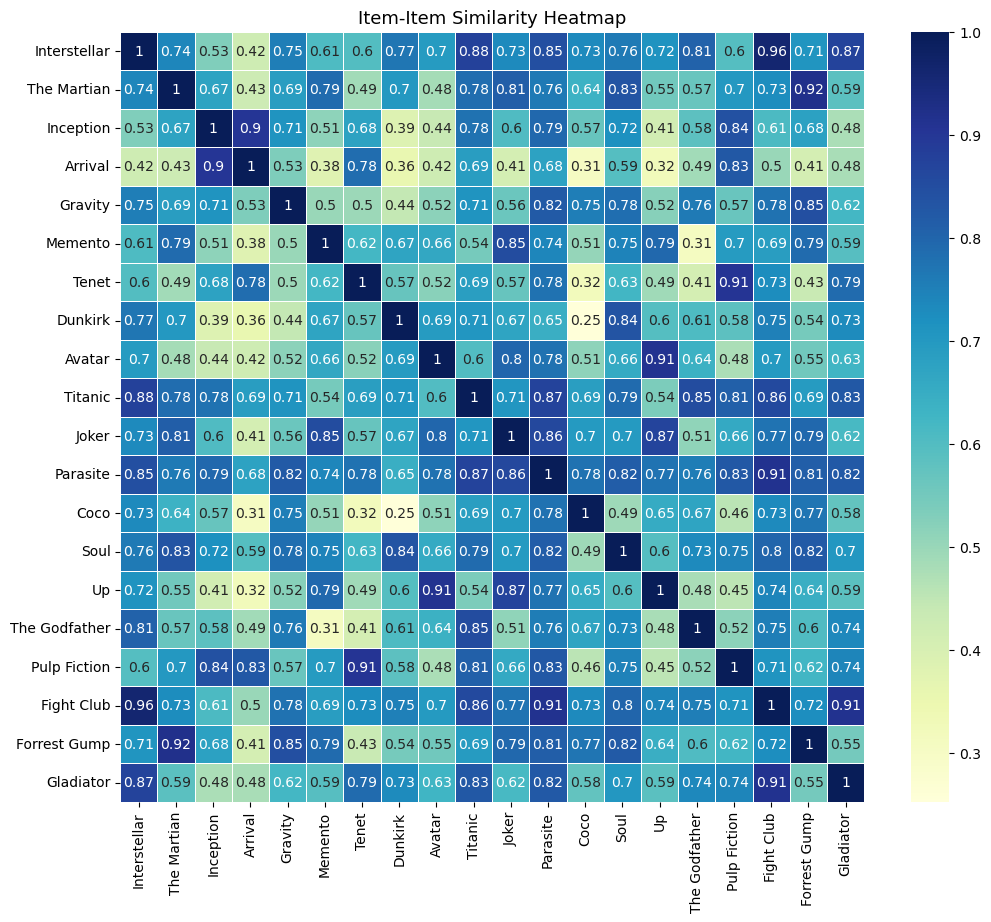

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set figure size
plt.figure(figsize=(12, 10))

# Step 2: Plot heatmap
sns.heatmap(
    item_similarity,             # the item-item similarity matrix
    cmap='YlGnBu',               # color map
    linewidths=0.5,              # grid lines between cells
    annot=True                  # set True if you want similarity numbers inside cells
)

# Step 3: Add title
plt.title('Item-Item Similarity Heatmap', fontsize=13)

# Step 4: Show plot
plt.show()

# Content - Based Filtering

In [55]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Movie dataset (same as before)
movies = pd.DataFrame({
    'Movie': ['Interstellar', 'The Martian', 'Inception', 'Gravity', 'Arrival'],
    'Action': [1, 1, 1, 1, 0],
    'SciFi': [1, 1, 1, 1, 1],
    'Drama': [1, 0, 1, 0, 1],
    'Adventure': [1, 1, 1, 0, 1]
})

display(movies)

# Multiple users with movies they liked
users_likes = {
    'Alice': ['Interstellar', 'Inception'],
    'Bob': ['The Martian', 'Gravity'],
    'Carol': ['Arrival', 'Interstellar'],
    'David': ['Inception', 'Gravity']
}

display(users_likes) 

,Movie,Action,SciFi,Drama,Adventure
0,Interstellar,1,1,1,1
1,The Martian,1,1,0,1
2,Inception,1,1,1,1
3,Gravity,1,1,0,0
4,Arrival,0,1,1,1


{'Alice': ['Interstellar', 'Inception'],
 'Bob': ['The Martian', 'Gravity'],
 'Carol': ['Arrival', 'Interstellar'],
 'David': ['Inception', 'Gravity']}

In [56]:
def recommend_cbf_for_user(user_name, user_likes, movies_df):
    # Build user profile vector (average of liked movies)
    liked_movies = movies_df[movies_df['Movie'].isin(user_likes[user_name])].drop('Movie', axis=1)
    user_profile = liked_movies.mean().values.reshape(1, -1)
    
    # Compute similarity of all movies to user profile
    movie_features = movies_df.drop('Movie', axis=1).values
    similarities = cosine_similarity(user_profile, movie_features).flatten()
    
    # Add similarity column
    recommendations = movies_df.copy()
    recommendations['Similarity'] = similarities
    
    # Remove movies the user already liked
    recommendations = recommendations[~recommendations['Movie'].isin(user_likes[user_name])]
    
    # Sort by similarity descending
    recommendations = recommendations.sort_values(by='Similarity', ascending=False)
    
    return recommendations[['Movie', 'Similarity']]


In [57]:
top_k = 3
all_user_recs = {}

for user in users_likes:
    recs = recommend_cbf_for_user(user, users_likes, movies)
    all_user_recs[user] = recs.head(top_k)

# Convert to a nice display DataFrame
recommendations_df = pd.DataFrame({
    user: all_user_recs[user]['Movie'].values
    for user in users_likes
})

print("Top-3 Content-Based Recommendations for All Users:\n")
display(recommendations_df)


Top-3 Content-Based Recommendations for All Users:



,Alice,Bob,Carol,David
0,The Martian,Interstellar,Inception,Interstellar
1,Arrival,Inception,The Martian,The Martian
2,Gravity,Arrival,Gravity,Arrival


# Matrix Factorization

* Every user and item can be represented in a latent vector space that captures hidden patterns in preferences.
* Instead of explictly defining genres, MF learns these factors automatically from the ratings matrix.
* We try to approximate the user-item matrix R as;

$$ 
\Large R \approx U * V^T 
$$ 

* R - user-item matrix ( users * items)
* U - user latent factors ( users * k)
* V - item latent factors ( items * k)
* k - number of latent factors

$$
\Large \hat{R_{u,i}} = U_u . V_i^T
$$

Model Based technique , works by decomposing the user -item interaction matrix into the product of two lower dimensional matrices. 

* We start with a large, sparse user-item interaction matrix R.
* We aim to approximate R as a product of two smaller matrices : U (user matrix) and V(item matrix)
* Each row in U represents a user's latent factors, while each row in V represents an item's latent factors.
* The dot product of a user vector and an item vector should approximate the user's rating for that item.

Two algorithms that makes this approach powerful and efficient ; 
 * Alternating Least Squares ( ALS)
    * Fix the user matrix and optimizer the item matrix
    * Fix the item matrix and optimize the user matrix
    * Repeat until convergence
 * Stochastic Gradient Descent ( SGD)
    * It updates the model after each training sample, rather than after a full pass through all the data.

In [59]:
import numpy as np

# Function to generate synthetic user-item interaction matrices
def generate_interaction_matrix(feedback_type='implicit', num_users=100, num_items=50, interaction_density=0.1, rating_scale=(1, 5)):
    np.random.seed(42)  # Ensure reproducible results
    
    # Generate implicit feedback matrix
    if feedback_type == 'implicit':
        # Create a random matrix with values in [0, 1)
        random_matrix = np.random.rand(num_users, num_items)
        # Create a binary interaction matrix based on the defined density
        interaction_matrix = (random_matrix < interaction_density).astype(int)
    # Generate explicit feedback matrix
    elif feedback_type == 'explicit':
        # Start with a matrix of zeros
        interaction_matrix = np.zeros((num_users, num_items))
        # Populate the matrix with random ratings within the specified scale
        for i in range(num_users):
            for j in range(num_items):
                if np.random.rand() < interaction_density:  # Apply density to decide on filling a cell
                    interaction_matrix[i, j] = np.random.randint(rating_scale[0], rating_scale[1] + 1)
    
    return interaction_matrix

# Example of a manually created user-item interaction matrix with explicit feedback
user_item_matrix = np.array([
    [3, 0, 2, 0, 0],
    [0, 0, 4, 5, 2],
    [1, 2, 0, 0, 0],
    [1, 0, 0, 4, 1],
    [0, 2, 3, 0, 0]
])

# Generate synthetic matrices
implicit_matrix = generate_interaction_matrix(feedback_type='implicit', num_users=100, num_items=50, interaction_density=0.1)
explicit_matrix = generate_interaction_matrix(feedback_type='explicit', num_users=100, num_items=50, interaction_density=0.1)

# Display samples from the generated matrices
print("Generated Implicit Feedback Matrix Sample:")
print(implicit_matrix[:5, :5])  # Display a 5x5 sample of the implicit matrix

print("Generated Explicit Feedback Matrix Sample:")
print(explicit_matrix[:5, :5])  # Display a 5x5 sample of the explicit matrix

print("Dummy Manual Matrix for Demonstration:")
print(user_item_matrix)  # Display the manually created matrix

Generated Implicit Feedback Matrix Sample:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]]
Generated Explicit Feedback Matrix Sample:
[[0. 0. 0. 0. 0.]
 [0. 0. 4. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Dummy Manual Matrix for Demonstration:
[[3 0 2 0 0]
 [0 0 4 5 2]
 [1 2 0 0 0]
 [1 0 0 4 1]
 [0 2 3 0 0]]


In [60]:
import numpy as np

def sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations):
    # num_factors: Number of latent factors to use. Higher values can capture more nuanced patterns but risk overfitting.
    # learning_rate: Controls the step size during optimization. Too high can cause overshooting, too low can lead to slow convergence.
    # regularization: Helps prevent overfitting by penalizing large parameter values.
    num_users, num_items = user_item_matrix.shape
    errors = []  # To store RMSE after each iteration
    
    # Initialize user and item latent factor matrices with small random values
    print("init user and item latent factors")
    user_factors = np.random.normal(scale=1./num_factors, size=(num_users, num_factors))
    item_factors = np.random.normal(scale=1./num_factors, size=(num_items, num_factors))
    
    # Iterate over the specified number of iterations
    for iteration in range(iterations):
        total_error = 0
        # Loop through all user-item pairs
        for u in range(num_users):
            # print(f'user = {u}')
            for i in range(num_items):
                #  print(f'item = {i}')
                # Only update factors for user-item pairs with interaction
                if user_item_matrix[u, i] > 0:
                    # Compute the prediction error
                    error = user_item_matrix[u, i] - np.dot(user_factors[u, :], item_factors[i, :].T)
                    total_error += error**2
                    # Update rules for user and item factors
                    user_factors[u, :] += learning_rate * (error * item_factors[i, :] - regularization * user_factors[u, :])
                    item_factors[i, :] += learning_rate * (error * user_factors[u, :] - regularization * item_factors[i, :])
        # Calculate RMSE for current iteration
        rmse = np.sqrt(total_error / np.count_nonzero(user_item_matrix))
        errors.append(rmse)

    return user_factors, item_factors, errors

def predict(user_factors, item_factors):
    """Predict the user-item interactions."""
    return np.dot(user_factors, item_factors.T)

Precision and Recall: Evaluate the accuracy of the system in terms of relevance of recommended items.
Normalized Discounted Cumulative Gain (NDCG): A ranking-based metric that measures the quality of rankings, considering the order of recommended items.

In [61]:
# Example usage parameters
num_factors = 3  # Number of latent factors
learning_rate = 0.001  # Learning rate for SGD
regularization = 0.1  # Regularization parameter
iterations = 10000  # Number of iterations

# Apply SGD ALS
# user_factors, item_factors, errors = sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations)
user_factors, item_factors, errors = sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations)
# Predict interactions
predictions = predict(user_factors, item_factors)

print("Predictions:")
print(predictions)

init user and item latent factors
Predictions:
[[2.751451   1.11286459 2.01391176 2.12328014 1.3543752 ]
 [2.17070876 2.08920653 3.83414642 4.9177779  1.85324007]
 [0.98936107 1.82105859 1.93081102 1.53343248 0.91175759]
 [0.99661501 0.91562097 2.45322376 3.7857576  1.09137982]
 [1.51150269 1.96518922 2.85363483 3.17031289 1.35631854]]
